In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

In [3]:
images.shape

(6012, 512, 512, 1)

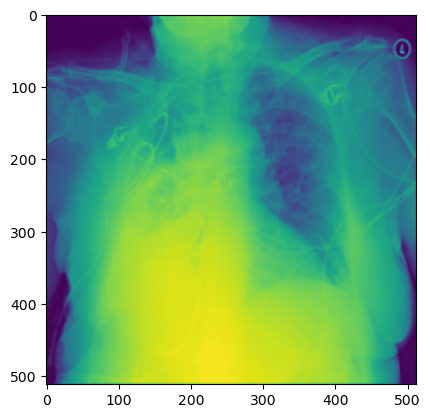

In [4]:
imshow(images[1001])

In [5]:
masks.shape

(6012, 512, 512, 1)

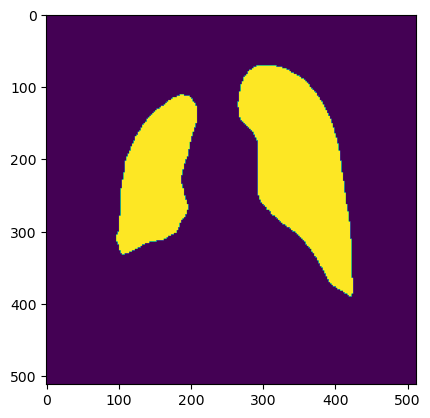

In [6]:
imshow(masks[1001])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpvge8e87ikuc_unet2d


In [11]:
hist = C.train(images[0:4992], masks[0:4992], images[4992:6012], masks[4992:6012], batch_size=16, patience_counter=4)

Epoch 1/100
312/312 [==============================] - 101s 279ms/step - loss: 0.4930 - dice_coeff: 0.3026 - val_loss: 0.5114 - val_dice_coeff: 0.3051
Epoch 2/100
312/312 [==============================] - 84s 270ms/step - loss: 0.4816 - dice_coeff: 0.3150 - val_loss: 0.4285 - val_dice_coeff: 0.3973
Epoch 3/100
312/312 [==============================] - 84s 270ms/step - loss: 0.2983 - dice_coeff: 0.5758 - val_loss: 0.2047 - val_dice_coeff: 0.7332
Epoch 4/100
312/312 [==============================] - 84s 270ms/step - loss: 0.1294 - dice_coeff: 0.8289 - val_loss: 0.0860 - val_dice_coeff: 0.8936
Epoch 5/100
312/312 [==============================] - 84s 270ms/step - loss: 0.0704 - dice_coeff: 0.9079 - val_loss: 0.0662 - val_dice_coeff: 0.9247
Epoch 6/100
312/312 [==============================] - 84s 270ms/step - loss: 0.0546 - dice_coeff: 0.9275 - val_loss: 0.0502 - val_dice_coeff: 0.9341
Epoch 7/100
312/312 [==============================] - 84s 270ms/step - loss: 0.0437 - dice_coeff: 

In [13]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

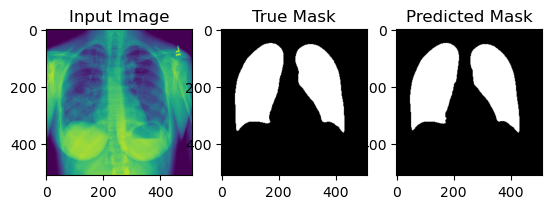

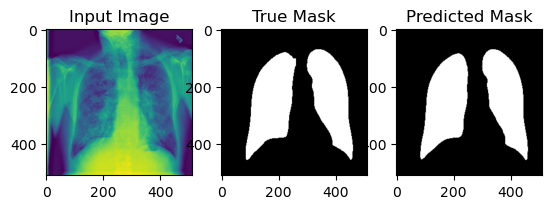

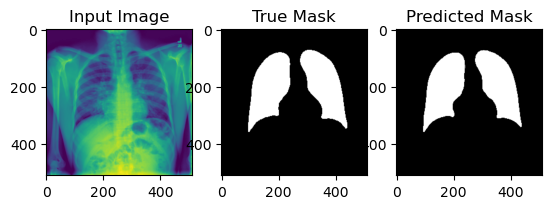

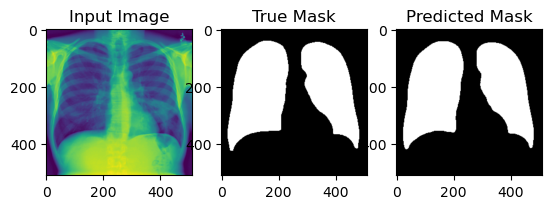

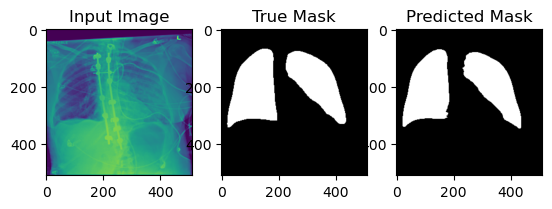

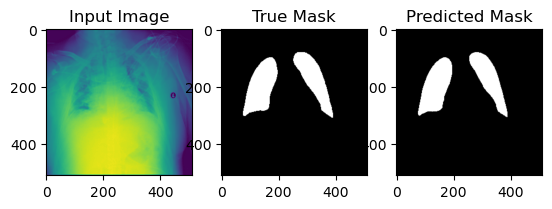

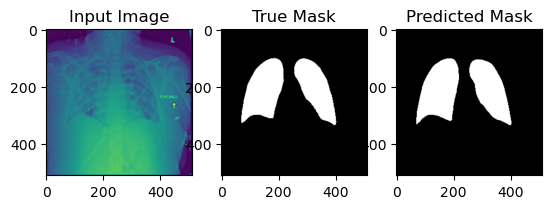

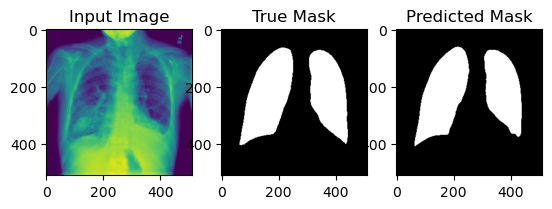

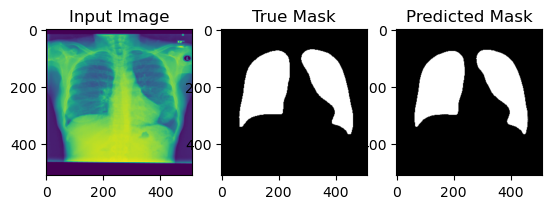

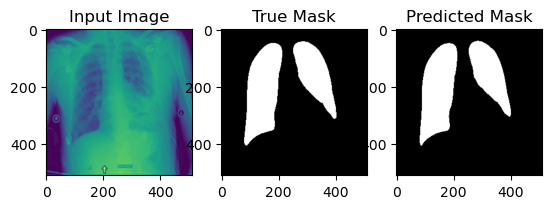

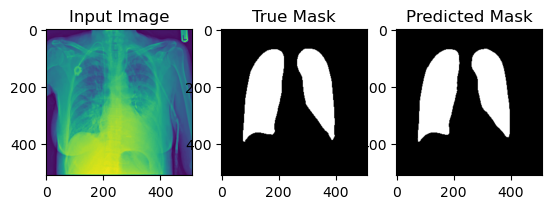

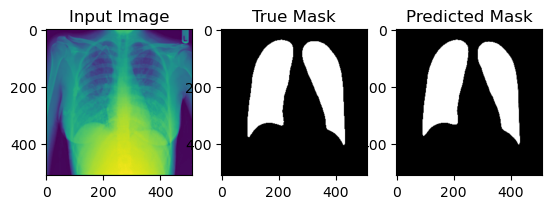

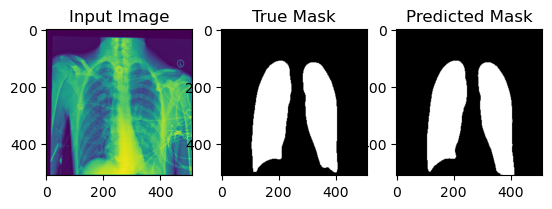

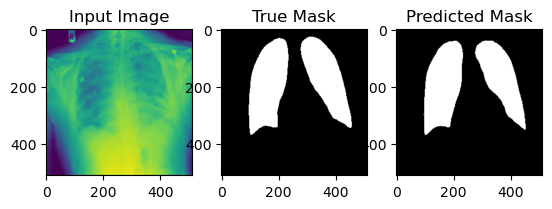

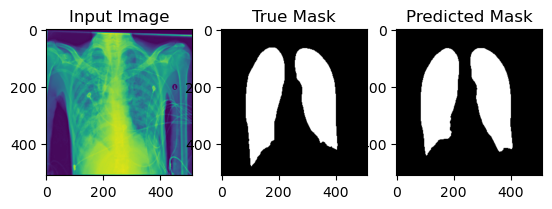

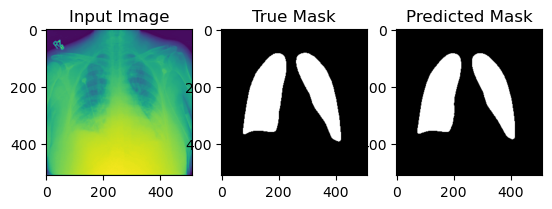

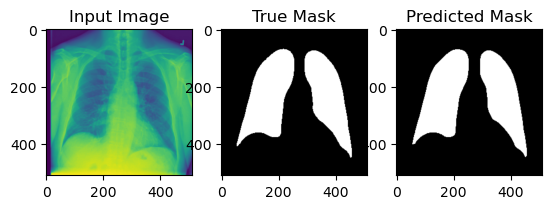

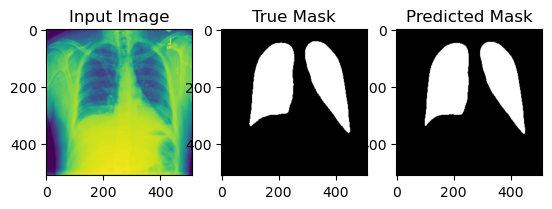

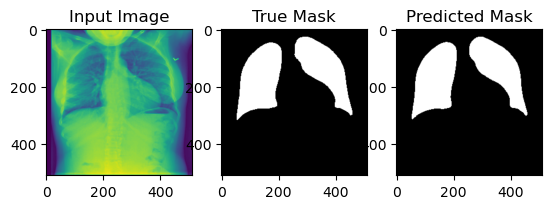

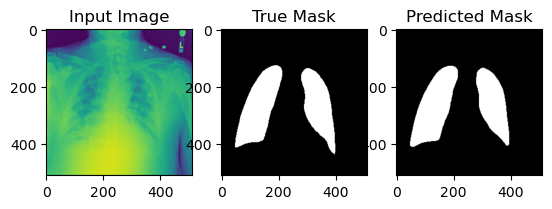

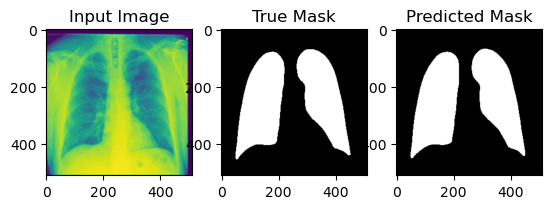

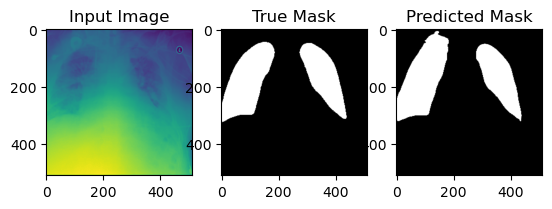

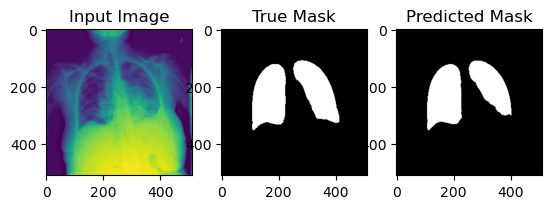

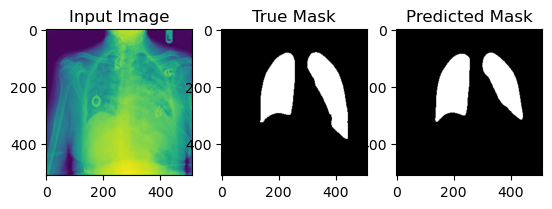

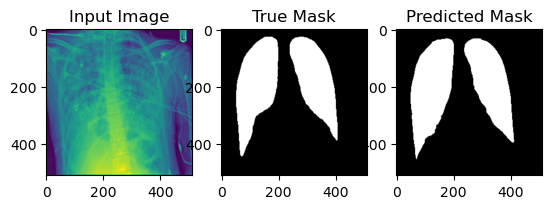

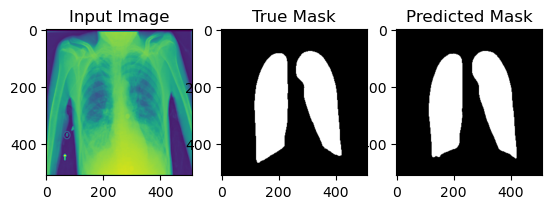

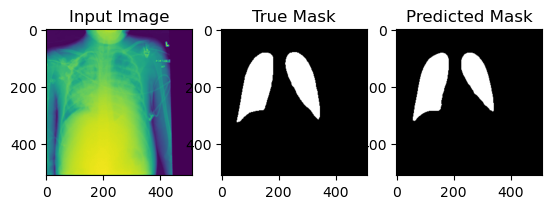

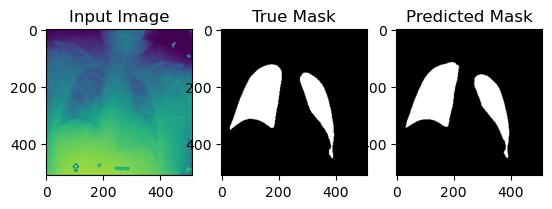

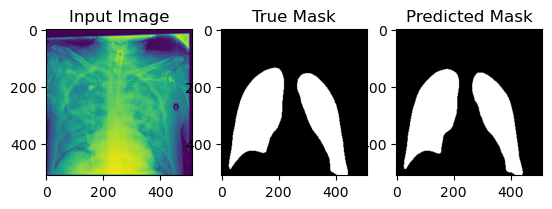

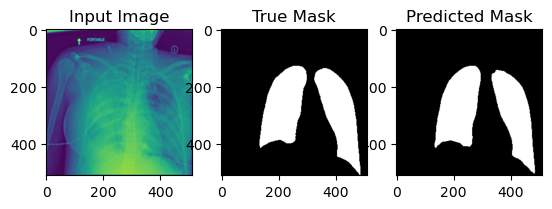

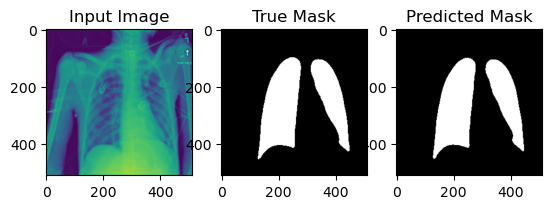

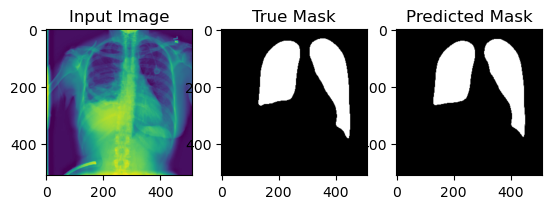

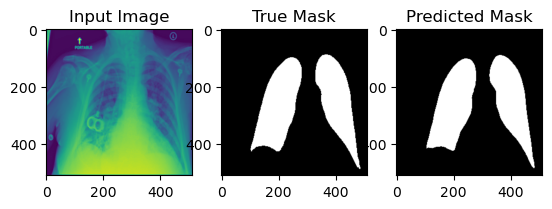

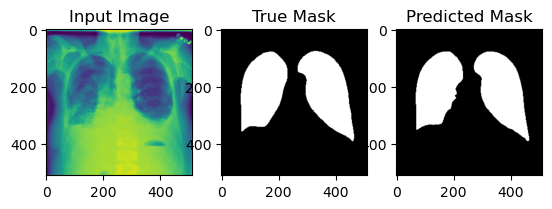

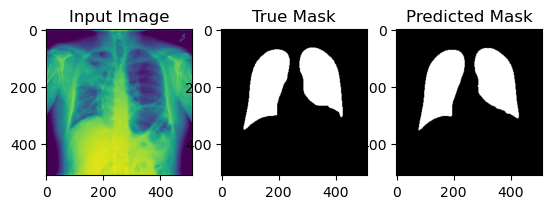

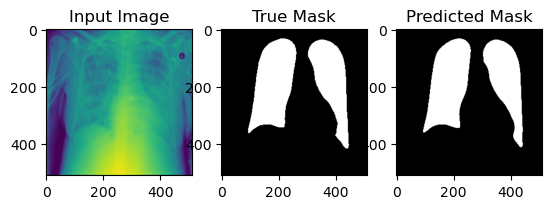

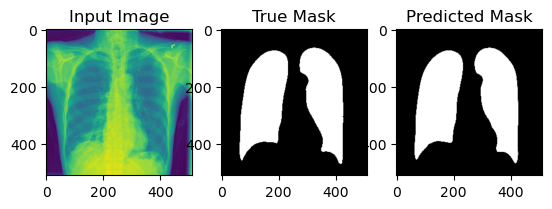

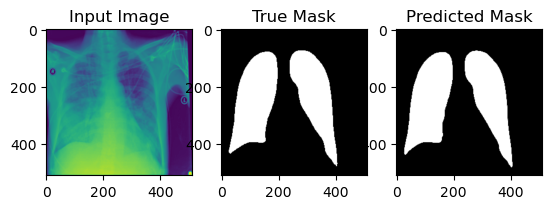

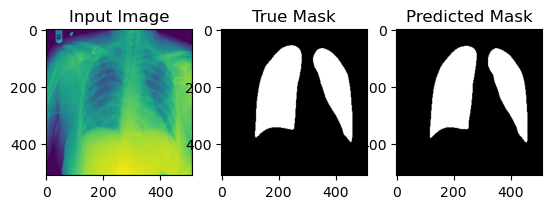

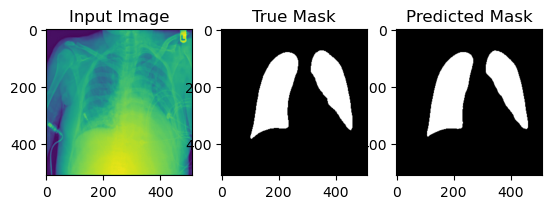

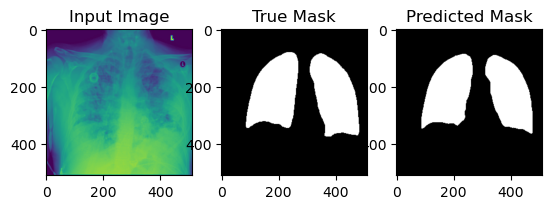

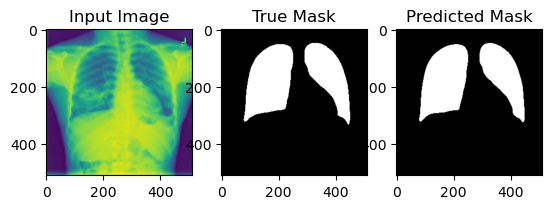

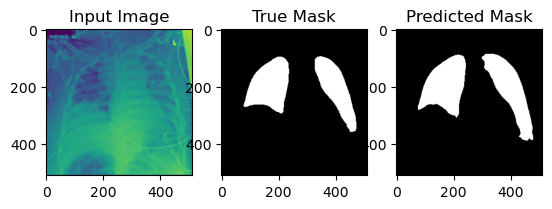

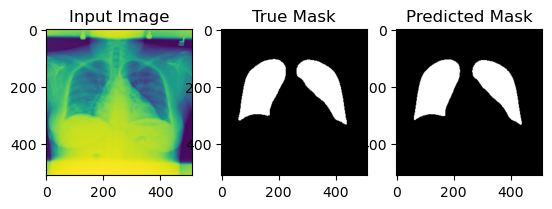

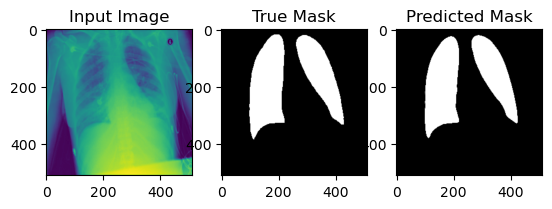

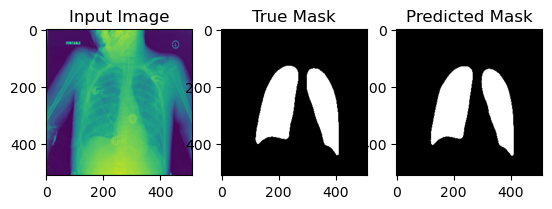

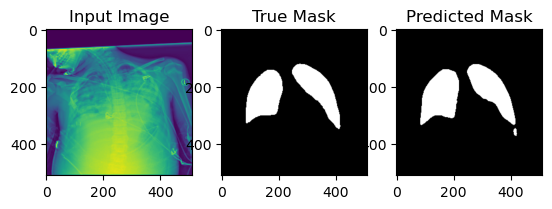

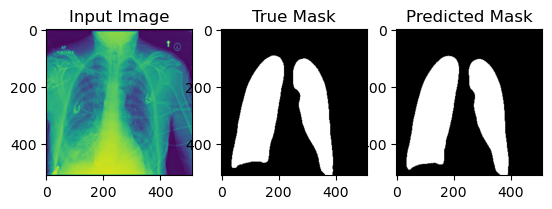

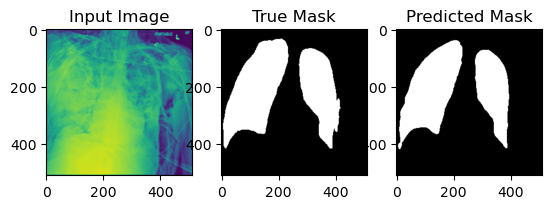

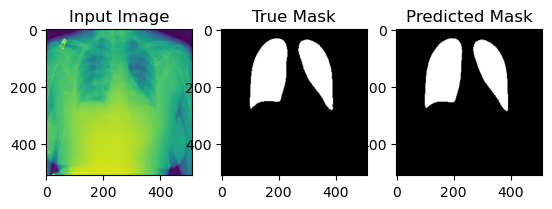

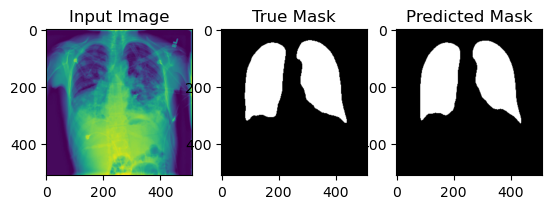

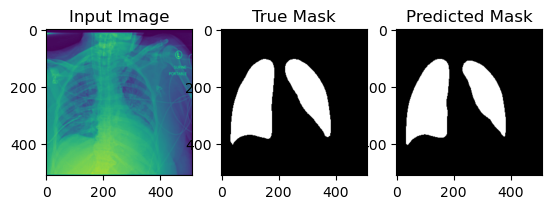

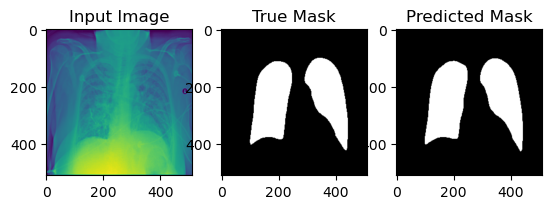

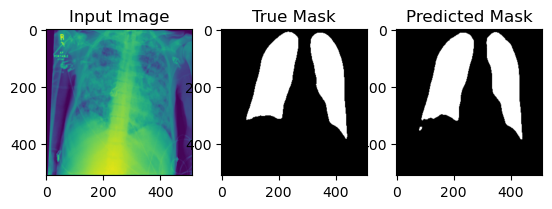

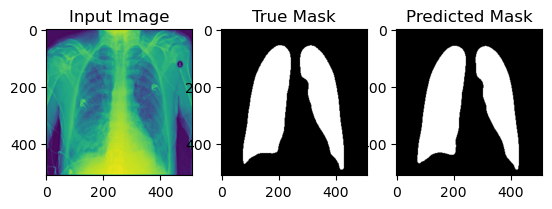

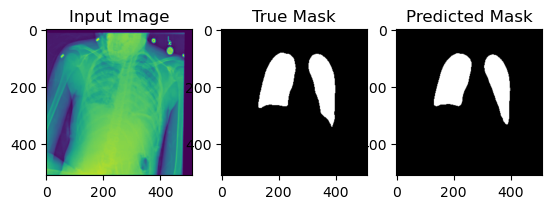

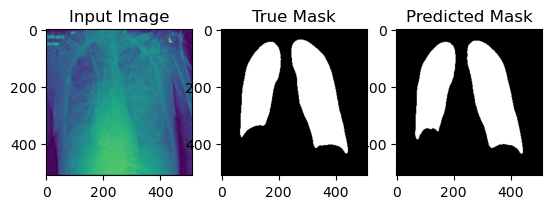

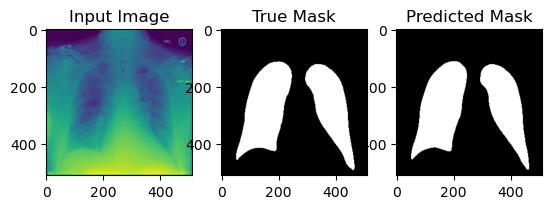

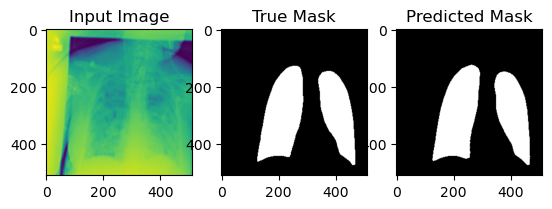

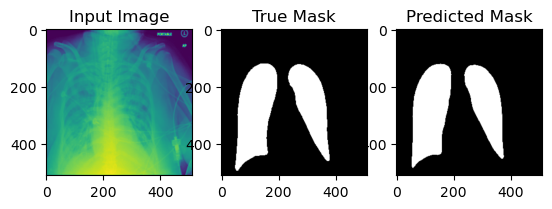

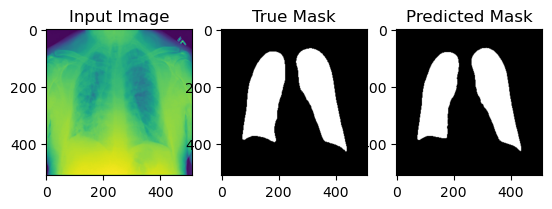

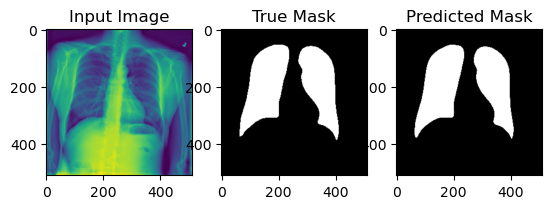

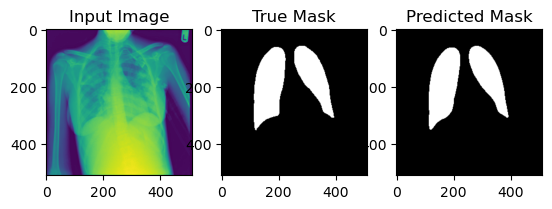

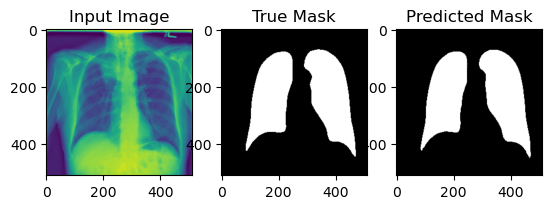

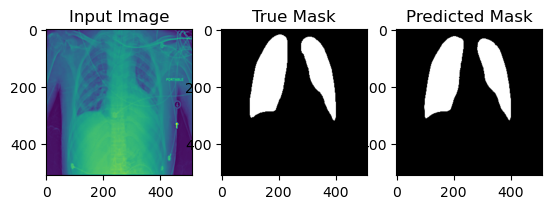

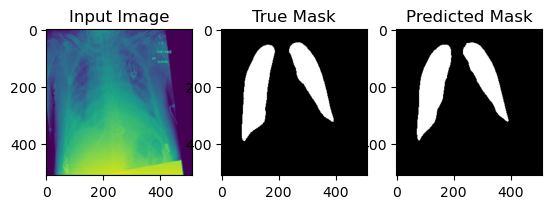

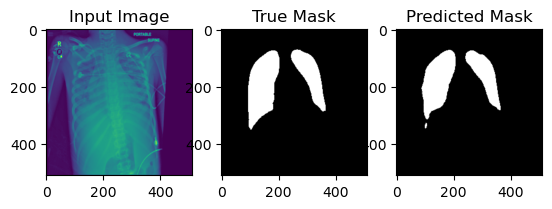

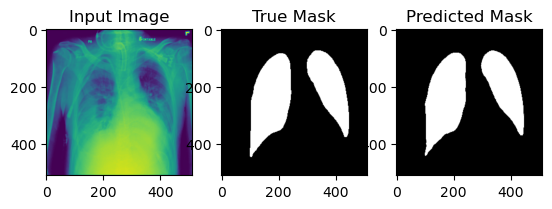

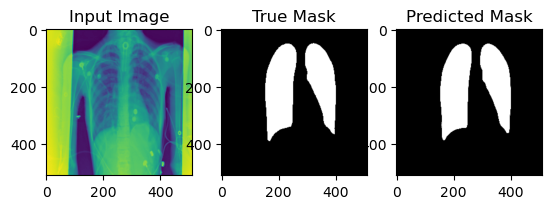

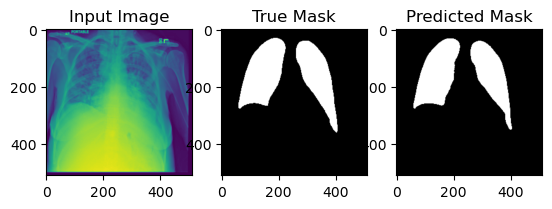

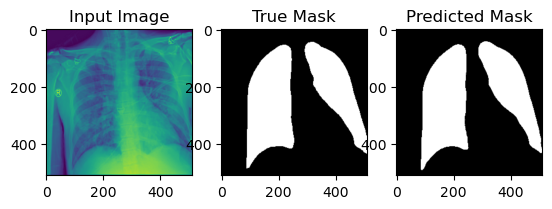

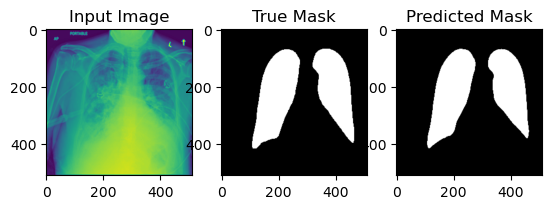

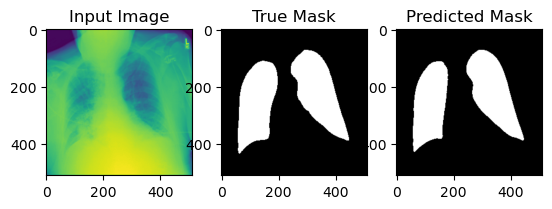

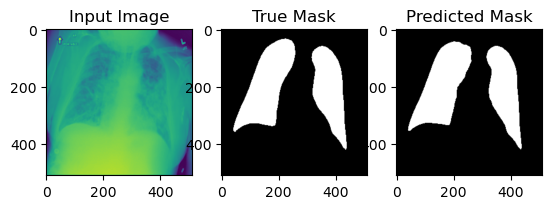

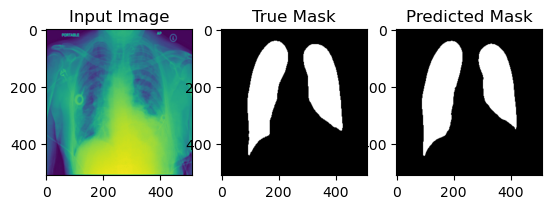

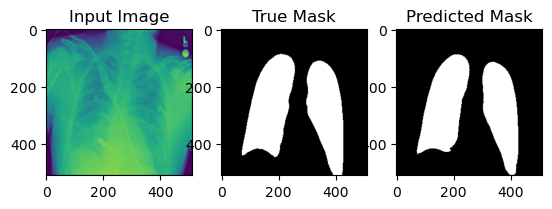

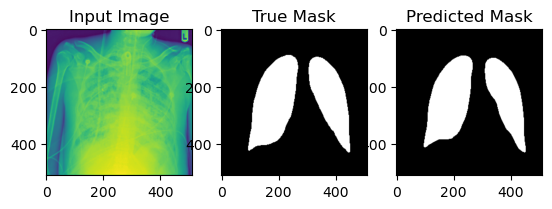

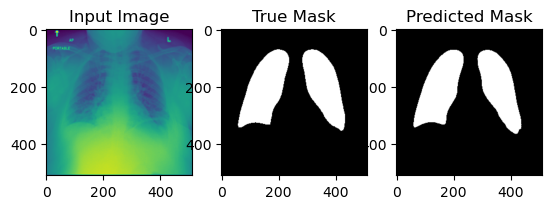

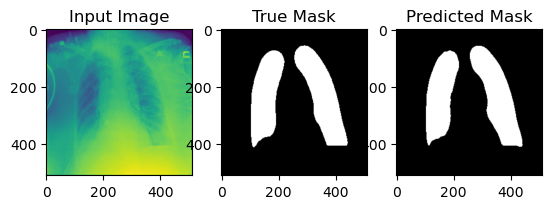

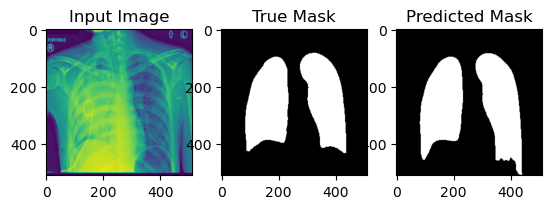

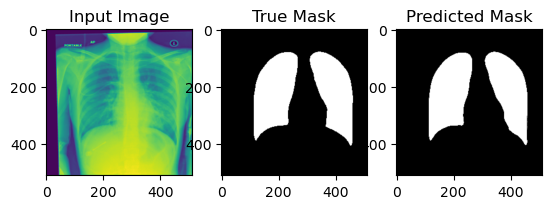

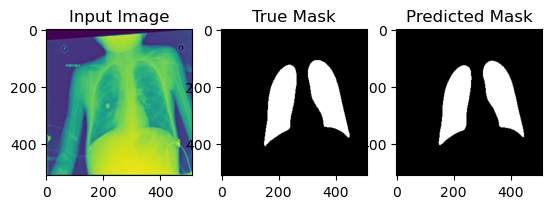

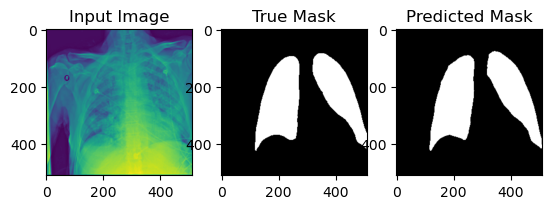

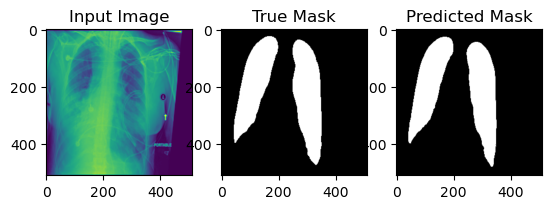

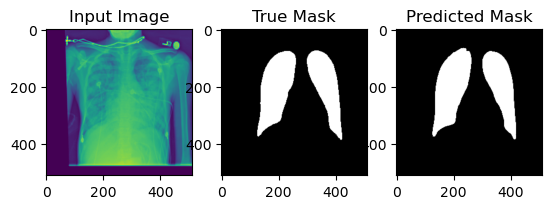

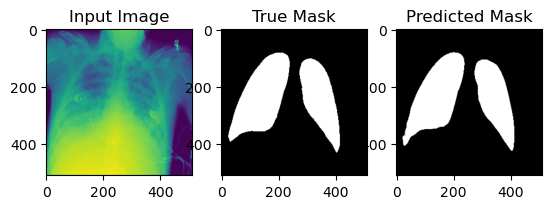

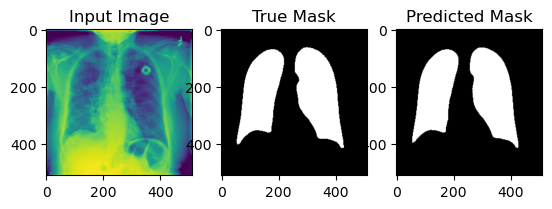

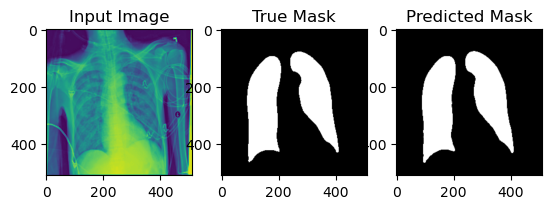

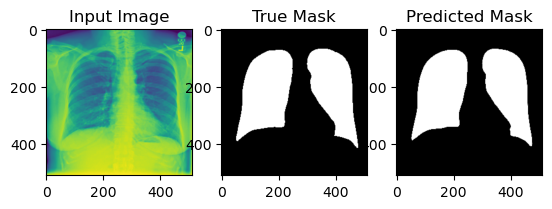

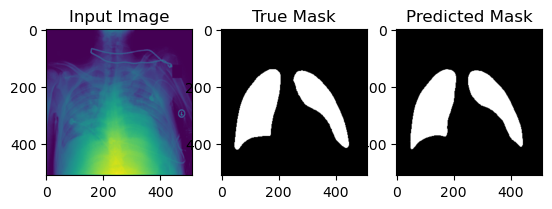

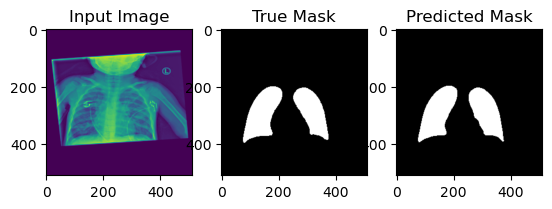

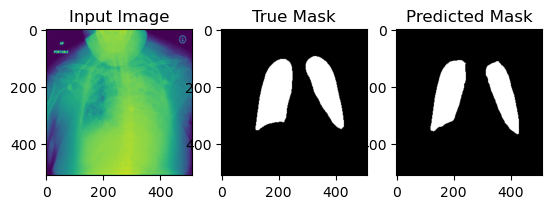

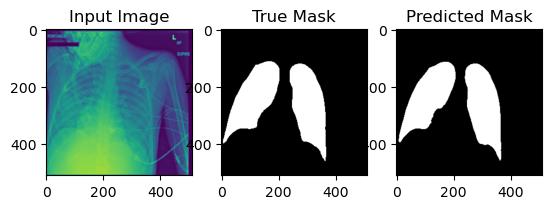

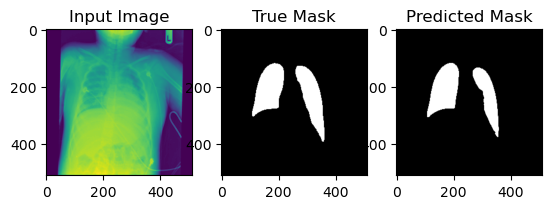

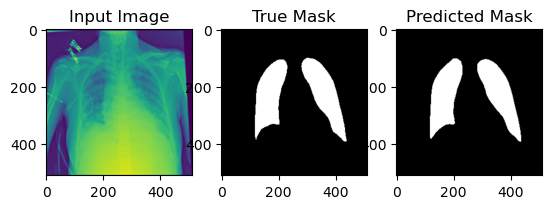

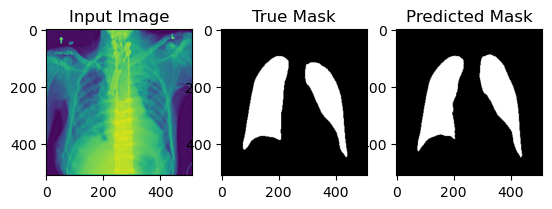

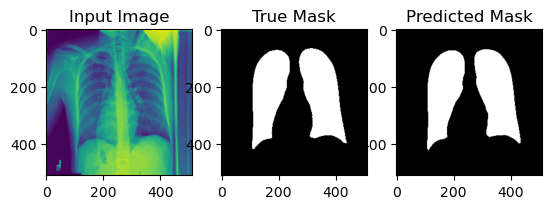

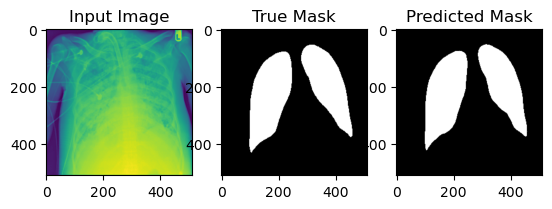

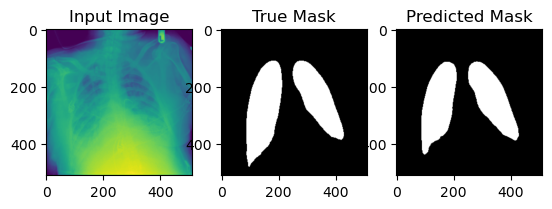

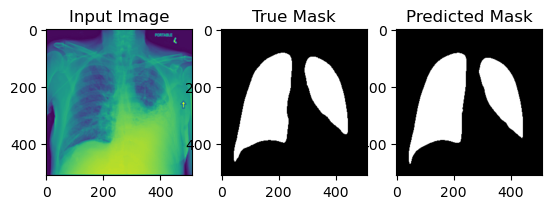

In [14]:
visualize_predictions(C, images[4992:6012], masks[4992:6012], num_samples=100)